# <center> Group Project 2 </center>
-----
# To Discuss:
1. Complaint types for the project: Blue bin seems related & illegal trash set out seems more about the personal behaviour
<br> Blue bin is IN.
2. Variable for analysis
<br> Time to resolve (up to 345), median, counts
3. Unit for analysis: Census Tract or TNT?

-----
# Research Question:
1. 
-----
# Cityline

In [1]:
import pandas as pd
import numpy as np
import datetime
import re
from IPython.display import display, HTML 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
dfc = pd.read_csv(r'Data/original/Cityline_Calls_for_Service_New.csv')
dfc.info()

dfc=dfc[(dfc['complaint_type_name']=='Blue Bin Skip') |
      (dfc['complaint_type_name']=='Trash Skip') |
      (dfc['complaint_type_name']=='Illegal Trash Set Out')]

dfc['complaint_type_name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57110 entries, 0 to 57109
Data columns (total 18 columns):
complaint_number                 57110 non-null object
open_date                        57110 non-null object
close_date                       57110 non-null object
complaint_type_name              57110 non-null object
status_type_name                 57110 non-null object
department_name                  57110 non-null object
received_via_type_name           57110 non-null object
identifier                       50250 non-null object
number                           50248 non-null object
address                          50250 non-null object
zip                              50248 non-null float64
location                         6867 non-null object
nearest_address                  1807 non-null object
nearest_address1                 175 non-null object
cross_street_1                   524 non-null object
cross_street_2                   135 non-null object
user_defined_actio

Illegal Trash Set Out    5645
Trash Skip               2444
Blue Bin Skip             762
Name: complaint_type_name, dtype: int64

In [3]:
dfc = dfc[(dfc['address'].str.contains(' [Tt][Oo] ')==False) & 
                              (dfc['address'].str.contains(' [Aa][Tt] ')==False) &
                              (dfc['address'].str.contains('&')==False)]

dfc['address'].count()
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7110 entries, 14 to 57105
Data columns (total 18 columns):
complaint_number                 7110 non-null object
open_date                        7110 non-null object
close_date                       7110 non-null object
complaint_type_name              7110 non-null object
status_type_name                 7110 non-null object
department_name                  7110 non-null object
received_via_type_name           7110 non-null object
identifier                       7110 non-null object
number                           7109 non-null object
address                          7110 non-null object
zip                              7109 non-null float64
location                         1 non-null object
nearest_address                  0 non-null object
nearest_address1                 0 non-null object
cross_street_1                   0 non-null object
cross_street_2                   0 non-null object
user_defined_action_type_name    6820 non

In [4]:
dfc.loc[dfc['address'].str.contains(' Rear$'),'address']=dfc['address'].str.replace(' Rear$','')

dfc.loc[dfc['address'].str.contains(' N$'),'address'] = 'North '+dfc['address'].str[:-2]
dfc.loc[dfc['address'].str.contains(' S$'),'address'] = 'South '+dfc['address'].str[:-2]
dfc.loc[dfc['address'].str.contains(' E$'),'address'] = 'East '+dfc['address'].str[:-2]
dfc.loc[dfc['address'].str.contains(' W$'),'address'] = 'West '+dfc['address'].str[:-2]

dfc['address']=dfc['address'].str.replace(' Ave$',' Avenue').str.replace(' Blvd$',' Boulevard').str.replace(' Cir$',' Circle'
                                        ).str.replace(' Ct$',' Court').str.replace(' Dr$',' Drive').str.replace(' Ext$',' Extension',
                                                                     ).str.replace(' Ln$',' Lane'
                                                                     ).str.replace(' Pk$',' Park'
                                                                     ).str.replace(' Pkwy$',' Parkway'
                                                                     ).str.replace(' Pl$',' Place'
                                                                     ).str.replace(' Rd$',' Road'
                                                                     ).str.replace(' Sq$',' Square'
                                                                     ).str.replace(' St$',' Street'
                                                                     ).str.replace(' Terr$',' Terrace'
                                                                     ).str.replace(' Tnpk$',' Turnpike'
                                                                     ).str.replace(' Luthr ',' Luther ')

dfc['street_address']=dfc['number']+' '+dfc['address'].str.upper()

In [5]:
pd.set_option('max_rows', 100)
dfc.groupby(['complaint_type_name','department_name'])['complaint_type_name'].count()

complaint_type_name    department_name 
Blue Bin Skip          DPW - Sanitation     573
Illegal Trash Set Out  DPW - ISR           4528
                       DPW - Sanitation      31
Trash Skip             DPW - Sanitation    1978
Name: complaint_type_name, dtype: int64

# Parcel

In [6]:
dfp = pd.read_csv(r'Data/original/Parcel_Data_April_2018.csv')

dfp.loc[dfp['FullName'].str.contains('&'), 'FullName'] = dfp['FullName'].str.extract('(.*)&')[0]
dfp.loc[dfp['FullName'].str.contains(' & '), 'FullName'] = dfp['FullName'].str.extract('(.*) & ')[0]
dfp.loc[dfp['FullName'].str.contains(' TO '), 'FullName'] = dfp['FullName'].str.extract('(.*) TO ')[0]
dfp.loc[dfp['FullName'].str.contains(' AT '), 'FullName'] = dfp['FullName'].str.extract('(.*) AT ')[0]
dfp.loc[dfp['FullName'].str.contains(' $'), 'FullName'] = dfp['FullName'].str.extract('(.*) $')[0]
dfp.loc[dfp['FullName'].str.contains(' REAR'), 'FullName'] = dfp['FullName'].str.extract('(.*) REAR')[0]
dfp.loc[dfp['FullName'].str.contains(' R '), 'FullName'] = dfp['FullName'].str.extract('(.*) R')[0]
dfp.loc[dfp['FullName'].str.contains(' $'), 'FullName'] = dfp['FullName'].str.extract('(.*) $')[0]
dfp.loc[dfp['FullName'].str.contains(' SIDE$'), 'FullName'] = dfp['FullName'].str.extract('(.*) SIDE$')[0]
dfp.loc[dfp['FullName'].str.contains('114 SABINE'), 'FullName'] = dfp['FullName'] + ' ST'
dfp.loc[dfp['FullName'].str.contains('194 CHAFFEE'), 'FullName'] = dfp['FullName'] + ' ST'

dfp.loc[dfp['FullName'].str.contains(' E$'),'FullName']=dfp['FullName'].str.extract('([^A-Z]*) ')[0]+' EAST '+dfp['FullName'].str.extract('[^A-Z]* (.*) [A-Z]$')[0]
dfp.loc[dfp['FullName'].str.contains(' W$'),'FullName']=dfp['FullName'].str.extract('([^A-Z]*) ')[0]+' WEST '+dfp['FullName'].str.extract('[^A-Z]* (.*) [A-Z]$')[0]
dfp.loc[dfp['FullName'].str.contains(' N$'),'FullName']=dfp['FullName'].str.extract('([^A-Z]*) ')[0]+' NORTH '+dfp['FullName'].str.extract('[^A-Z]* (.*) [A-Z]$')[0]
dfp.loc[dfp['FullName'].str.contains(' S$'),'FullName']=dfp['FullName'].str.extract('([^A-Z]*) ')[0]+' SOUTH '+dfp['FullName'].str.extract('[^A-Z]* (.*) [A-Z]$')[0]

dfp['FullName']=dfp['FullName'].str.replace(' AVE*$',' AVENUE').str.replace(' ALY$',' ALLEY'
                              ).str.replace(' BLVD$',' BOULEVARD').str.replace(' BRG$',' BRIDGE').str.replace(' CIR$',' CIRCLE'
                              ).str.replace(' CT$',' COURT').str.replace(' DR$',' DRIVE' ).str.replace(' EXT$',' EXTENSION',
                              ).str.replace(' GRN$',' GREEN').str.replace(' L[AN]$',' LANE').str.replace(' PK$',' PARK'
                              ).str.replace(' PKWY$',' PARKWAY').str.replace(' PL$',' PLACE').str.replace(' RD$',' ROAD'
                              ).str.replace(' SQ$',' SQUARE').str.replace(' ST$',' STREET').str.replace(' TER+$',' TERRACE'
                              ).str.replace(' TNPK$',' TURNPIKE')

# Merge

In [7]:
dfm = pd.merge(dfc,
               dfp.drop_duplicates('FullName'),
               left_on = 'street_address',
               right_on = 'FullName',
               how = 'left',
               validate = 'm:1',
               indicator = True)

dfm['CensusTrac']=dfm['CensusTrac'].str.replace('Null','0').astype(float)*100
dfm['CensusTrac']=dfm['CensusTrac'].fillna(0).astype(int).astype(str).str.zfill(6)
dfm['FIPS'] = '36067' + dfm['CensusTrac']
dfm['_merge'].value_counts()

both          7068
left_only       42
right_only       0
Name: _merge, dtype: int64

# Merge Census

In [8]:
dfd = pd.read_csv(r'Data/original/1216_ACS.csv', dtype={'FIPS': 'str'})

dfct = pd.merge(dfd,
                dfm.drop_duplicates('FIPS')[['FIPS','complaint_number']],
                on = 'FIPS',
                how = 'inner',
                validate = '1:1',
                indicator = True
               )

df = pd.merge(dfm.drop(columns=['_merge']), 
              dfct.drop(columns=['_merge', 'complaint_number']), 
              on = 'FIPS', 
              how = 'left', 
              validate = "m:1", 
              indicator = True 
             )

In [9]:
dfct['_merge'].value_counts()

both          53
right_only     0
left_only      0
Name: _merge, dtype: int64

In [10]:
df['_merge'].value_counts()

both          7064
left_only       46
right_only       0
Name: _merge, dtype: int64

# Close Time

In [11]:
df['close_time'] =  pd.to_timedelta( \
                              ( \
                               (pd.to_datetime(df['close_date'], infer_datetime_format=True ).dt.round(freq = 'D')) \
                                - \
                               (pd.to_datetime(df['open_date'], infer_datetime_format=True ).dt.round(freq = 'D')) \
                              ), \
                               unit='d').dt.days

df.loc[df['close_time'] <= 1, 'close_time'] = 1

In [12]:
df.to_csv('Group Project/df.csv')
dfct.to_csv('Group Project/dfct.csv')
dfc.to_csv('Group Project/dfc.csv')
dfp.to_csv('Group Project/dfp.csv')


-------
# Initial Information Analysis
## Population

In [13]:
dfct[['FIPS' , 'pop1216']].head(53)
#dfct['pop1216'].sum()

,FIPS,pop1216
0,36067000100,674
1,36067000200,2929
2,36067000300,1642
3,36067000400,3772
4,36067000501,2205
5,36067000600,3735
6,36067000700,1605
7,36067000800,2551
8,36067000900,3015
9,36067001000,4001


## Median Income

In [14]:
dfct[['mhinc1216']].describe()

,mhinc1216
count,53.000000
mean,36424.281340
std,18274.089697
min,9911.631000
25%,24288.150000
50%,31994.470000
75%,43433.640000
max,92193.220000


## % Foreign Born

In [15]:
dfct[['pfb1216']].describe()

,pfb1216
count,53.000000
mean,0.118875
std,0.094437
min,0.012658
25%,0.050000
50%,0.084963
75%,0.183526
max,0.380115


## % Edu Level

In [16]:
dfct[['pedlt1216']].describe() #No HS

,pedlt1216
count,53.000000
mean,0.200075
std,0.116025
min,0.025791
25%,0.106455
50%,0.180441
75%,0.284210
max,0.532405


In [17]:
dfct[['pedhs1216']].describe() #HS and No College

,pedhs1216
count,53.000000
mean,0.538734
std,0.129839
min,0.128060
25%,0.470386
50%,0.571553
75%,0.629344
max,0.743166


In [18]:
dfct[['pedba1216']].describe() #College

,pedba1216
count,53.000000
mean,0.261191
std,0.190090
min,0.031700
25%,0.110670
50%,0.218667
75%,0.317485
max,0.836158


-----------
# Analysis
## Count Analysis:
1. % and count of all complaints
2. % of population
3. Scatter plot (% of complaints vs % of population)

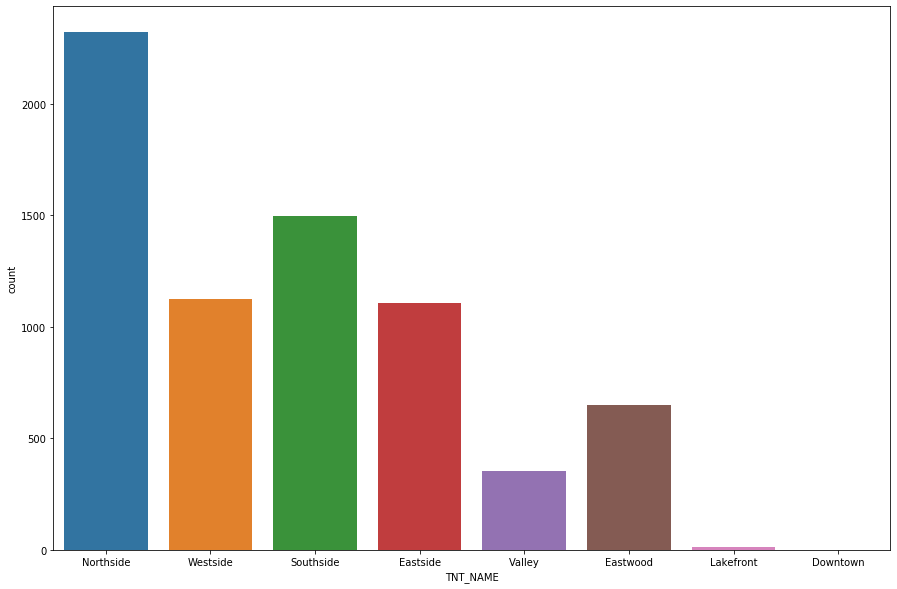

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x="TNT_NAME", data=df)

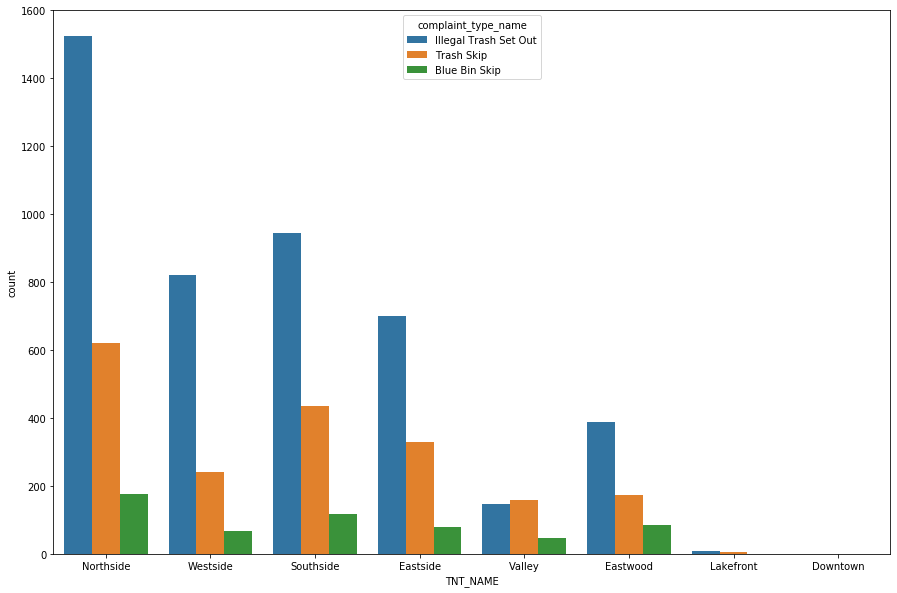

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x="TNT_NAME", hue="complaint_type_name", data=df)

In [21]:
df.groupby(['TNT_NAME', 'complaint_type_name'])['TNT_NAME'].count().unstack('complaint_type_name').to_csv('data/output/GP_1117_Chart1.csv')

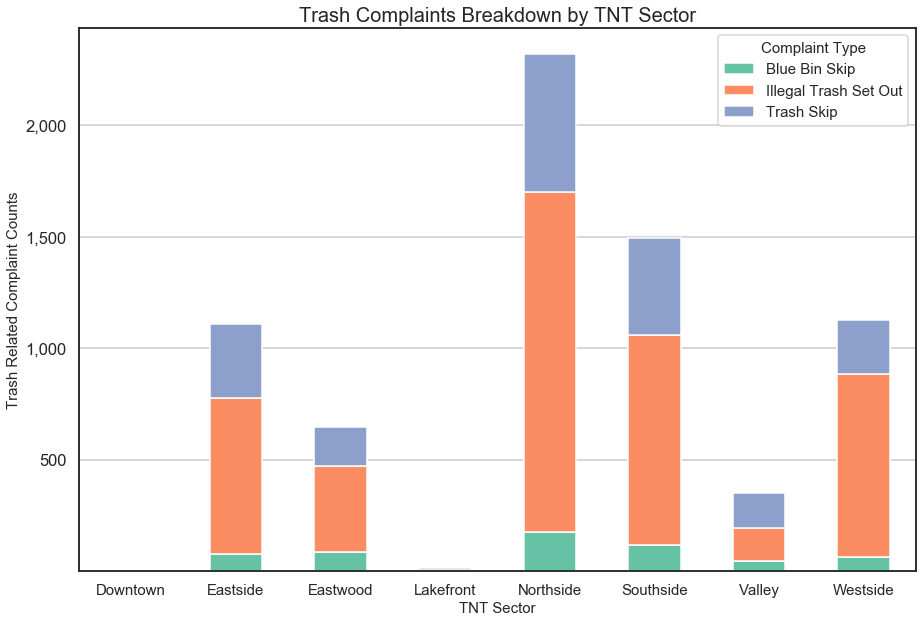

In [22]:
sns.set(font="sans-serif", #The font used for all text
        style="white", #The style of Seaborn
        context="talk", #Preconfigured plot size and scale type in Seaborn; options arranged by size: paper, notebook, talk, and poster
        rc={"figure.figsize":(15, 10), #The size of the figure (y, x) in inches
            "font.size":15, #The default font size
            "axes.titlesize":15, #The size of the x and y axes titles, if titles are set
            "axes.labelsize":10} #The size of the x and y axes labels, if labels are set
        )


nhcomp = df.groupby(['TNT_NAME', 'complaint_type_name'])['TNT_NAME'].count().unstack('complaint_type_name').fillna(0)
#nhcomp = nhcomp.sort_values('Illegal Trash Set Out', ascending=False)
nhcomp1 = nhcomp.plot(kind = 'bar', 
            stacked = True,  
            title = 'Breakdown of Complaint Types', 
            figsize=(15,10),
            color=['#66c2a5','#fc8d62','#8da0cb']
           )

plt.xticks(rotation=0, fontsize=15)
plt.xlabel('TNT Sector', fontsize=15)
plt.ylabel('Trash Related Complaint Counts', fontsize=15)
plt.title('Trash Complaints Breakdown by TNT Sector', fontsize=20)

plt.yticks([500,1000,1500,2000],['500','1,000','1,500','2,000'])
plt.legend(title='Complaint Type', fontsize=15, title_fontsize=15)
plt.grid(axis='y')
plt.savefig('data/output/GP_1117_Count2.png',bbox_inches = "tight")

In [23]:
dfct['mhinc1216'].describe()

count       53.000000
mean     36424.281340
std      18274.089697
min       9911.631000
25%      24288.150000
50%      31994.470000
75%      43433.640000
max      92193.220000
Name: mhinc1216, dtype: float64

### Median Income

In [24]:
df['mhinc1216'].describe()

count     7064.000000
mean     36994.244144
std      17358.419597
min       9911.631000
25%      26657.280000
50%      31994.470000
75%      42044.320000
max      92193.220000
Name: mhinc1216, dtype: float64

(array([497.,   0., 117., 369.,  72.,   0.,   0.,   0.,   0.,   0.,  85.,
        171.,  92.,   0.,   0., 141.,   0.,   0.,   0., 216.]),
 array([43433.64 , 45871.619, 48309.598, 50747.577, 53185.556, 55623.535,
        58061.514, 60499.493, 62937.472, 65375.451, 67813.43 , 70251.409,
        72689.388, 75127.367, 77565.346, 80003.325, 82441.304, 84879.283,
        87317.262, 89755.241, 92193.22 ]),
 <a list of 20 Patch objects>)

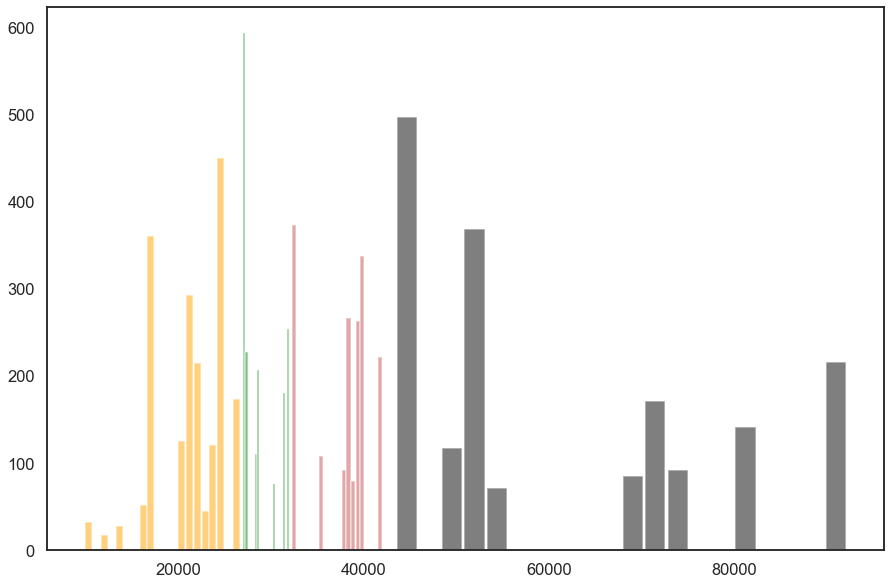

In [25]:
df['mhinc_qcut'] = pd.qcut(df['mhinc1216'],q=4,labels=['25%','50%','75%','100%'])
df['mhinc_qcut'].value_counts()


x1 = df.loc[df['mhinc_qcut']=='25%', 'mhinc1216']
x2 = df.loc[df['mhinc_qcut']=='50%', 'mhinc1216']
x3 = df.loc[df['mhinc_qcut']=='75%', 'mhinc1216']
x4 = df.loc[df['mhinc_qcut']=='100%', 'mhinc1216']

kwargs = dict(alpha=0.5, bins=20, rwidth=0.9)

plt.hist(x1, **kwargs, color='orange', label='Q1')
plt.hist(x2, **kwargs, color='green', label='Q2')
plt.hist(x3, **kwargs, color='r', label='Q3')
plt.hist(x4, **kwargs, color='black', label='Q4')

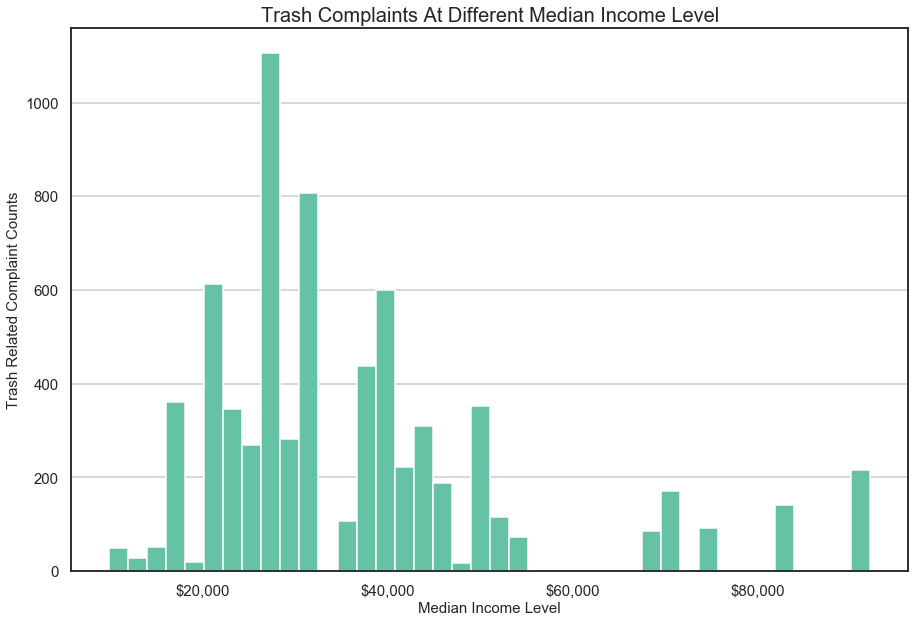

In [26]:
df.hist(column='mhinc1216', bins = 40, figsize = (15,10), color='#66c2a5')

plt.xlabel('Median Income Level', fontsize=15)
plt.ylabel('Trash Related Complaint Counts',fontsize=15)
plt.title('Trash Complaints At Different Median Income Level',fontsize = 20)
plt.xticks([20000, 40000, 60000, 80000],['$20,000','$40,000','$60,000','$80,000'],fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='x')
plt.savefig('data/output/GP_1117_MHI1.png',bbox_inches = "tight")
plt.show()


### Median Income Distribution - Based on TNT

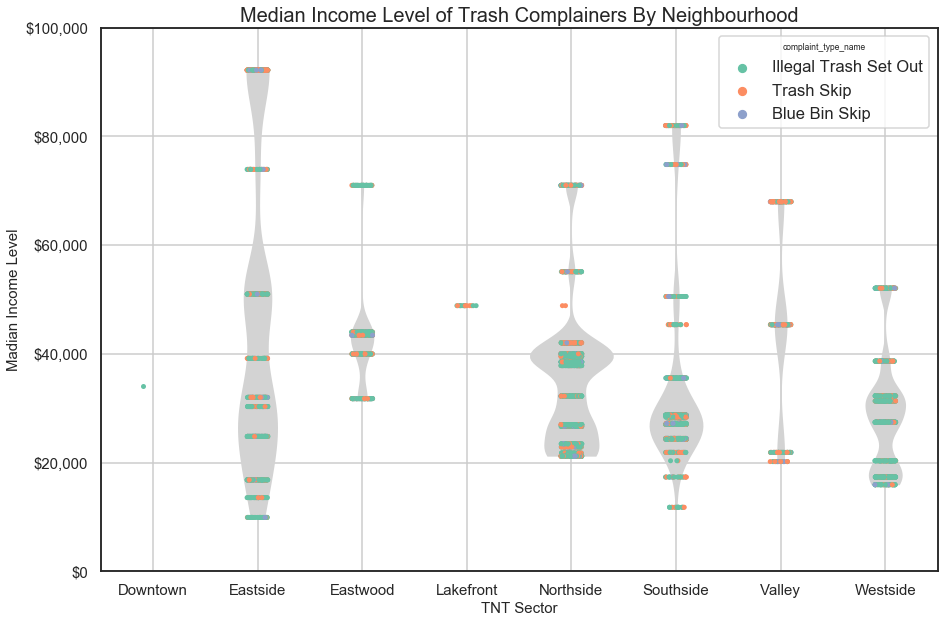

In [27]:
sns.set(font="sans-serif", #The font used for all text
        style="white", #The style of Seaborn
        context="talk", #Preconfigured plot size and scale type in Seaborn; options arranged by size: paper, notebook, talk, and poster
        rc={"figure.figsize":(15, 10), #The size of the figure (y, x) in inches
            "font.size":15, #The default font size
            "axes.titlesize":15, #The size of the x and y axes titles, if titles are set
            "axes.labelsize":10} #The size of the x and y axes labels, if labels are set
        )
df = df.sort_values('TNT_NAME',ascending=True)
sns.violinplot(x='TNT_NAME', y="mhinc1216", 
               data=df, palette=['lightgrey'],cut=0,inner=None, scale='count',linewidth=0)
sns.stripplot(x='TNT_NAME', y='mhinc1216', hue='complaint_type_name', data=df, jitter=True, palette=['#66c2a5','#fc8d62','#8da0cb'])

plt.title('Median Income Level of Trash Complainers By Neighbourhood',fontsize = 20)
plt.xlabel('TNT Sector', fontsize=15)
plt.ylabel('Madian Income Level',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([0, 20000, 40000, 60000, 80000, 100000],['$0','$20,000','$40,000','$60,000','$80,000','$100,000'],fontsize=15)
plt.grid(axis='both')
#plt.savefig('data/output/GP_1117_MHI2.png',bbox_inches = "tight")
plt.show()

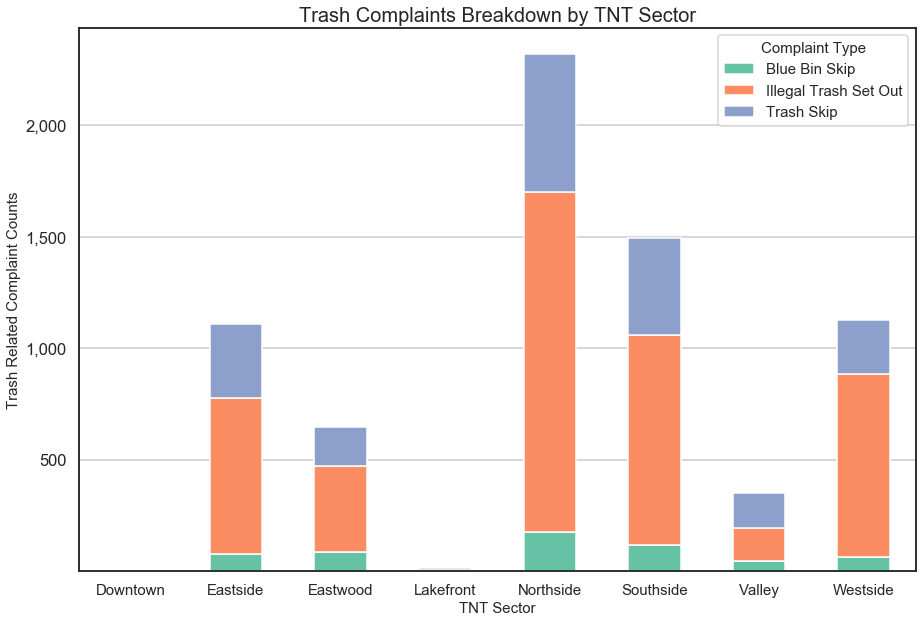

In [28]:
df['mhinc_range']=pd.cut(df['mhinc1216'],bins=pd.interval_range(start=0, freq=20000, end=100000))

nhcomp = df.groupby(['TNT_NAME', 'complaint_type_name'])['TNT_NAME'].count().unstack('complaint_type_name').fillna(0)
#nhcomp = nhcomp.sort_values('Illegal Trash Set Out', ascending=False)
nhcomp1 = nhcomp.plot(kind = 'bar', 
            stacked = True,  
            title = 'Breakdown of Complaint Types', 
            figsize=(15,10),
            color=['#66c2a5','#fc8d62','#8da0cb']
           )

plt.xticks(rotation=0, fontsize=15)
plt.xlabel('TNT Sector', fontsize=15)
plt.ylabel('Trash Related Complaint Counts', fontsize=15)
plt.title('Trash Complaints Breakdown by TNT Sector', fontsize=20)

plt.yticks([500,1000,1500,2000],['500','1,000','1,500','2,000'])
plt.legend(title='Complaint Type', fontsize=15, title_fontsize=15)
plt.grid(axis='y')
plt.savefig('data/output/GP_1117_Count2.png',bbox_inches = "tight")

## Education

In [29]:
fip_df = df[["TNT_NAME","FIPS",'pedlt1216']].dropna().groupby(["TNT_NAME","FIPS",'pedlt1216']).sum().reset_index()

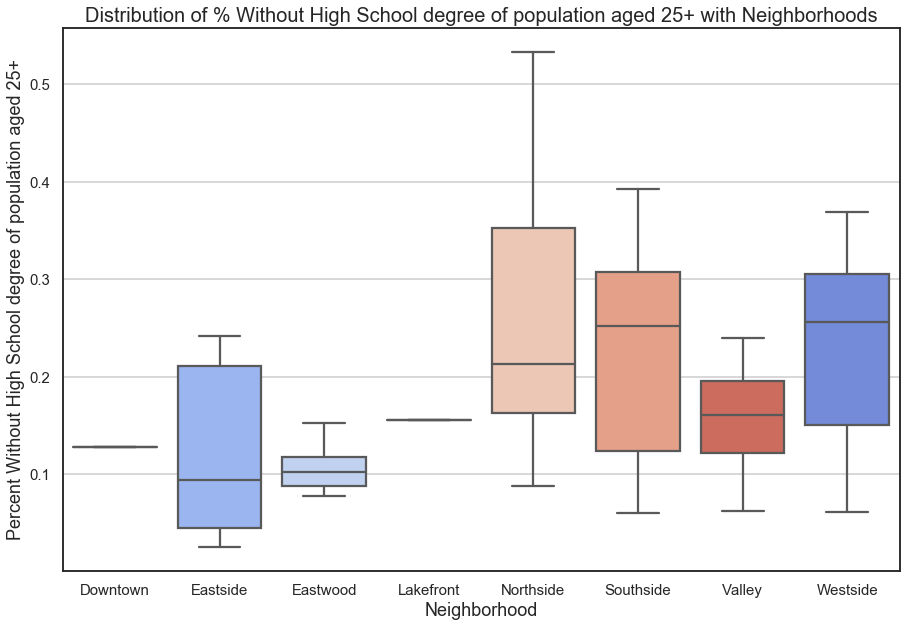

In [30]:
#fip_df.reset_index(inplace=True)
fig, axes = plt.subplots(figsize=(15,10))
sns.boxplot("TNT_NAME","pedlt1216", data=fip_df, ax = axes, palette=sns.color_palette("coolwarm", 7))
axes.set_title("Distribution of % Without High School degree of population aged 25+ with Neighborhoods", fontsize=20)
axes.yaxis.grid(True)
axes.set_xlabel('Neighborhood', fontsize=18)
axes.set_ylabel('Percent Without High School degree of population aged 25+', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

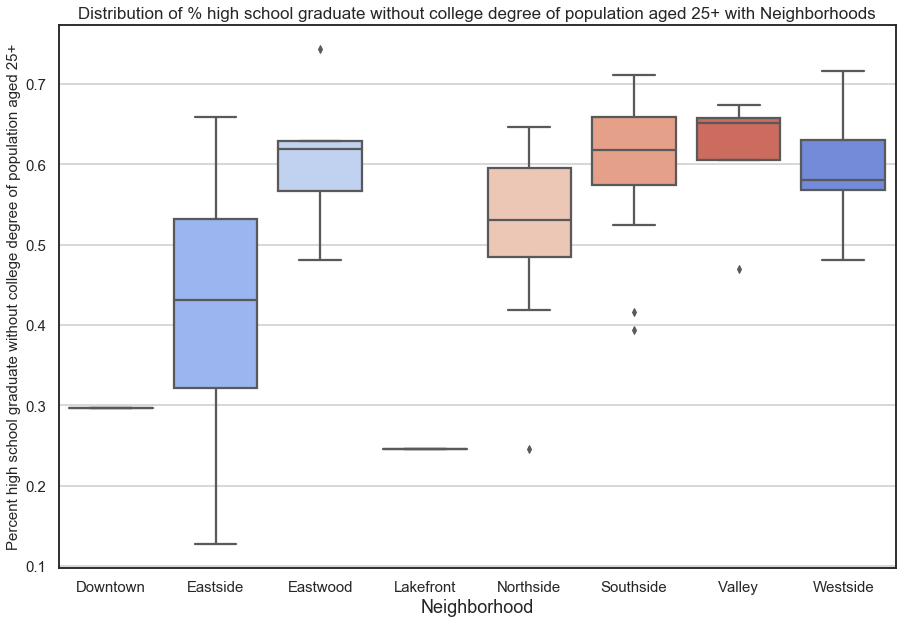

In [31]:
fip_df = df[["TNT_NAME","FIPS",'pedhs1216']].dropna().groupby(["TNT_NAME","FIPS",'pedhs1216']).sum().reset_index()
fip_df.reset_index(inplace=True)
fig, axes = plt.subplots(figsize=(15,10))
H2 = sns.boxplot("TNT_NAME","pedhs1216", data=fip_df, ax = axes, palette=sns.color_palette("coolwarm", 7))
axes.set_title("Distribution of % high school graduate without college degree of population aged 25+ with Neighborhoods", fontsize=17)
axes.yaxis.grid(True)
axes.set_xlabel('Neighborhood', fontsize=18)
axes.set_ylabel('Percent high school graduate without college degree of population aged 25+', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

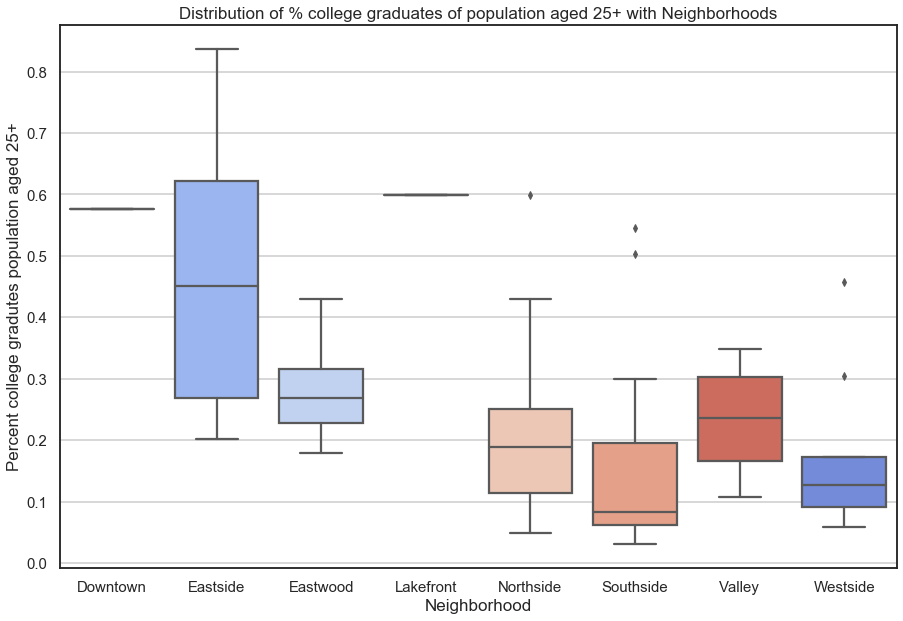

In [32]:
fip_df = df[["TNT_NAME","FIPS",'pedba1216']].dropna().groupby(["TNT_NAME","FIPS",'pedba1216']).sum().reset_index()
fip_df.reset_index(inplace=True)
fig, axes = plt.subplots(figsize=(15,10))
H3 = sns.boxplot("TNT_NAME","pedba1216", data=fip_df, ax = axes, palette=sns.color_palette("coolwarm", 7))
axes.set_title("Distribution of % college graduates of population aged 25+ with Neighborhoods", fontsize=17)
axes.yaxis.grid(True)
axes.set_xlabel('Neighborhood',fontsize=17)
axes.set_ylabel('Percent college gradutes population aged 25+',fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
H3.figure.savefig('data/output/GP_Edu_BA_Box1')

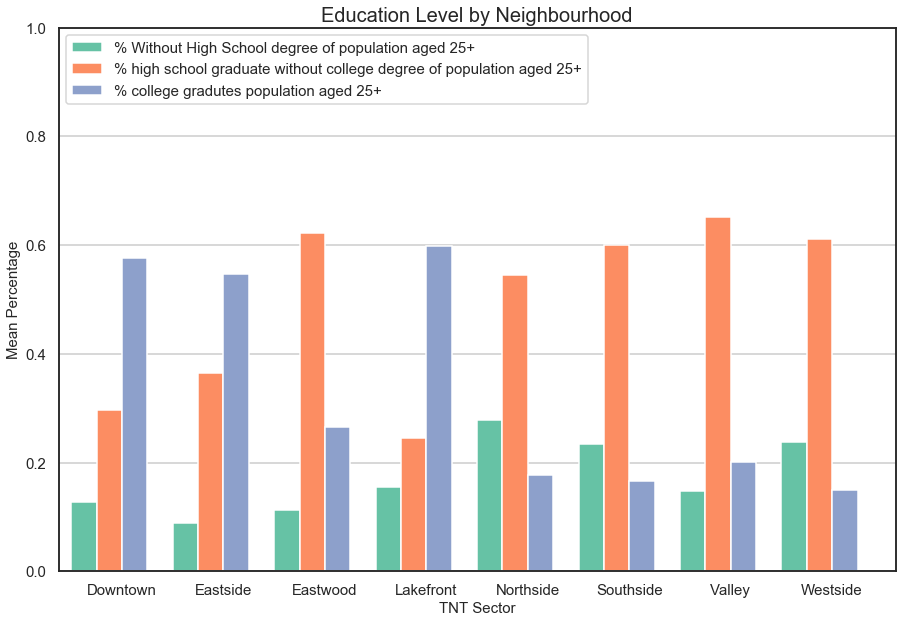

In [33]:
fip_df_subset = df[["TNT_NAME",'pedlt1216','pedhs1216','pedba1216']].dropna()
fip_df_subset = fip_df_subset.groupby(["TNT_NAME"])['pedlt1216','pedhs1216','pedba1216'].agg([np.mean]).reset_index()
fip_df_subset.columns = ['TNT_NAME', 'pedlt1216', 'pedhs1216', 'pedba1216']

# Setting the positions and width for the bars
pos = list(range(len(fip_df_subset['pedlt1216']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,10))

# Create a bar with pre_score data,
# in position pos,
H4 = plt.bar(pos, 
        #using df['pre_score'] data,
        fip_df_subset['pedlt1216'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='#66c2a5', 
        # with label the first value in first_name
        label=fip_df_subset['TNT_NAME'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
H4 = plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        fip_df_subset['pedhs1216'],
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='#fc8d62', 
        # with label the second value in first_name
        label=fip_df_subset['TNT_NAME'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
H4 = plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        fip_df_subset['pedba1216'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='#8da0cb', 
        # with label the third value in first_name
        label=fip_df_subset['TNT_NAME'][2]) 

# Set the y axis label
ax.set_ylabel('Mean Percentage', fontsize=15)
ax.set_xlabel('TNT Sector', fontsize=15)
# Set the chart's title
ax.set_title('Education Level by Neighbourhood',fontsize=20)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(fip_df_subset['TNT_NAME'],fontsize=15)

plt.yticks(fontsize=15)


# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(fip_df_subset['pedlt1216'] + fip_df_subset['pedhs1216'] + fip_df_subset['pedba1216'])] )

# Adding the legend and showing the plot
plt.legend(['% Without High School degree of population aged 25+', 
            '% high school graduate without college degree of population aged 25+',
            '% college gradutes population aged 25+'], fontsize=15,loc='upper left')
plt.grid(axis='y')

plt.savefig('data/output/GP_1117_Edu1.png',bbox_inches = "tight")
plt.show()

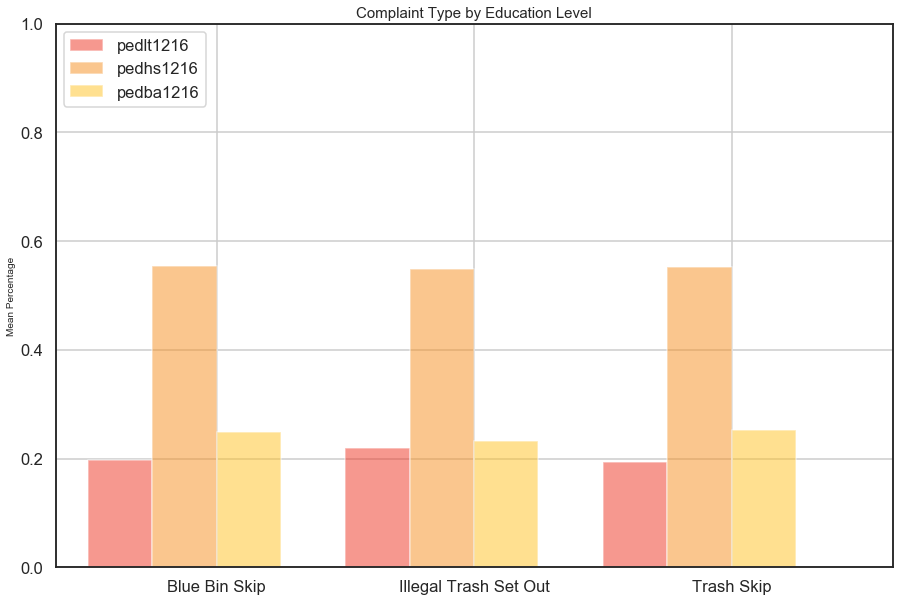

In [34]:
data_trash_complaints = df[["complaint_type_name",'pedlt1216','pedhs1216','pedba1216']].dropna()
fip_df_subset = data_trash_complaints.groupby(["complaint_type_name"])['pedlt1216','pedhs1216','pedba1216'].agg([np.mean]).reset_index()
fip_df_subset.columns = ['complaint_type_name', 'pedlt1216', 'pedhs1216', 'pedba1216']

# Setting the positions and width for the bars
pos = list(range(len(fip_df_subset['pedlt1216']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,10))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        fip_df_subset['pedlt1216'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3220', 
        # with label the first value in first_name
        label=fip_df_subset['complaint_type_name'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        fip_df_subset['pedhs1216'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=fip_df_subset['complaint_type_name'][0]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        fip_df_subset['pedba1216'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=fip_df_subset['complaint_type_name'][0]) 

# Set the y axis label
ax.set_ylabel('Mean Percentage')

# Set the chart's title
ax.set_title('Complaint Type by Education Level')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(fip_df_subset['complaint_type_name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(fip_df_subset['pedlt1216'] + fip_df_subset['pedhs1216'] + fip_df_subset['pedba1216'])] )

# Adding the legend and showing the plot
plt.legend(['pedlt1216', 'pedhs1216', 'pedba1216'], loc='upper left')
plt.grid()
plt.show()

----
## Time to Resolve

In [35]:
df['close_time'].value_counts()
df['close_time'].describe()

count    7110.000000
mean        5.865682
std        10.474431
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       346.000000
Name: close_time, dtype: float64

In [36]:
df[df['complaint_type_name']=='Illegal Trash Set Out']['close_time'].describe()

count    4559.000000
mean        4.984426
std         9.247367
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       137.000000
Name: close_time, dtype: float64

In [37]:
df[df['complaint_type_name']=='Trash Skip']['close_time'].describe()

count    1978.000000
mean        6.654196
std         7.699183
min         1.000000
25%         2.000000
50%         6.000000
75%         8.000000
max       170.000000
Name: close_time, dtype: float64

In [38]:
df[df['complaint_type_name']=='Blue Bin Skip']['close_time'].describe()

count    573.000000
mean      10.155323
std       21.224622
min        1.000000
25%        1.000000
50%        6.000000
75%       11.000000
max      346.000000
Name: close_time, dtype: float64

### Outlier in Time to Resolve

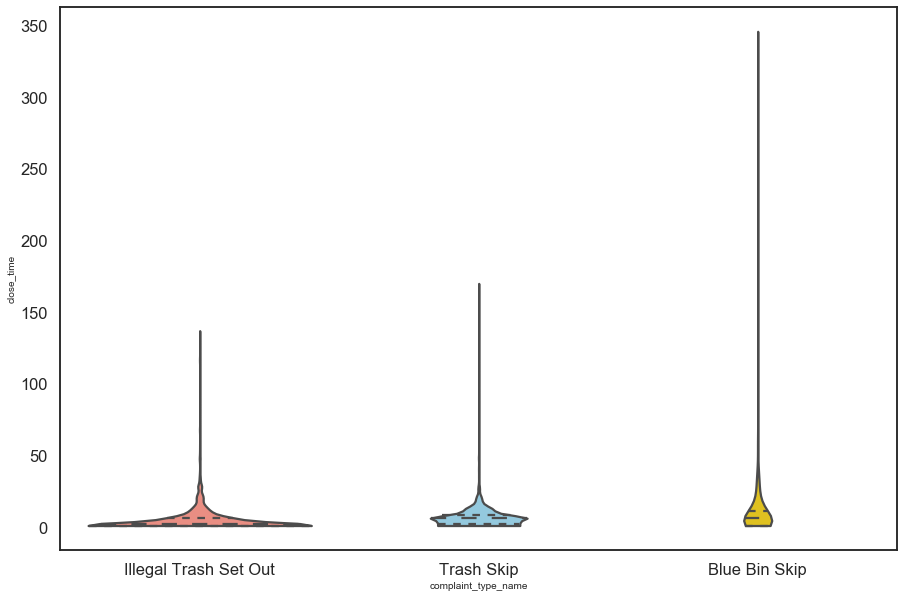

In [39]:
plt.figure(figsize=(15,10))
sns.violinplot(x='complaint_type_name', y="close_time", 
               data=df, split=True,inner="quartile",palette=['salmon','skyblue','gold'], scale='count', cut=0)

In [283]:
from scipy import stats
df_setout = df[df['complaint_type_name']=='Illegal Trash Set Out'].copy()
df_setout['zscore'] = stats.zscore(df_setout['close_time'])
df_setout['close_time'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        42,  44,  46,  47,  48,  49,  50,  52,  53,  56,  57,  60,  65,
        67,  68,  69,  75,  78,  85,  93,  95,  97, 115, 117, 119, 124,
       126, 132, 137])

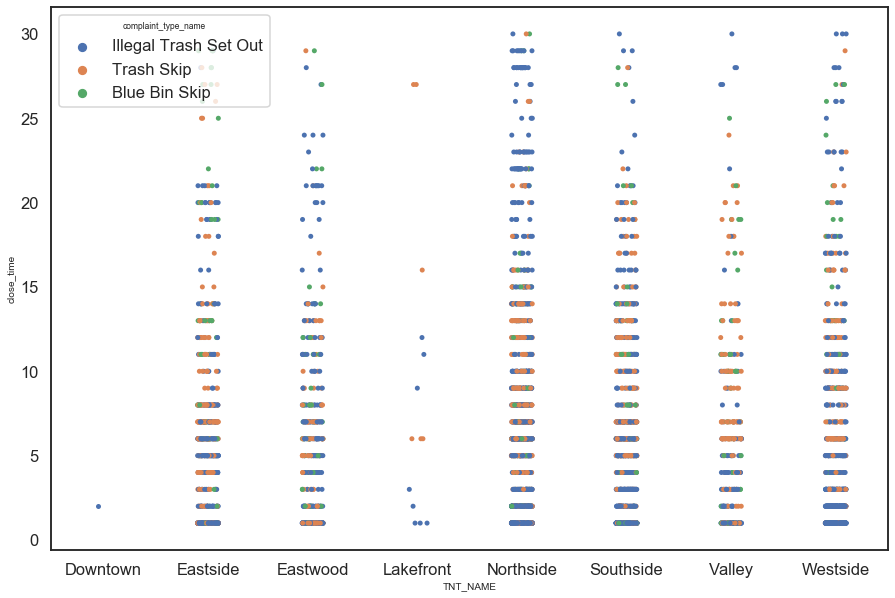

In [44]:
df30 = df[df['close_time'] <= 30 ]
sns.stripplot(x='TNT_NAME', y='close_time', hue='complaint_type_name', data=df30)

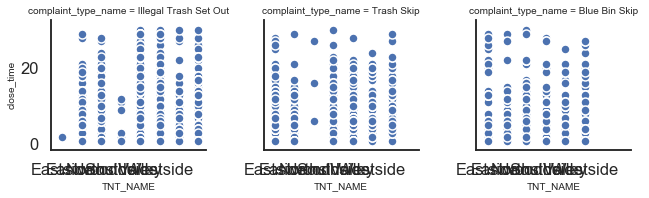

In [45]:
g = sns.FacetGrid(df30, col="complaint_type_name")
g = (g.map(plt.scatter, "TNT_NAME", "close_time", edgecolor="w")
       .add_legend())

g

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b606190>]],
      dtype=object)

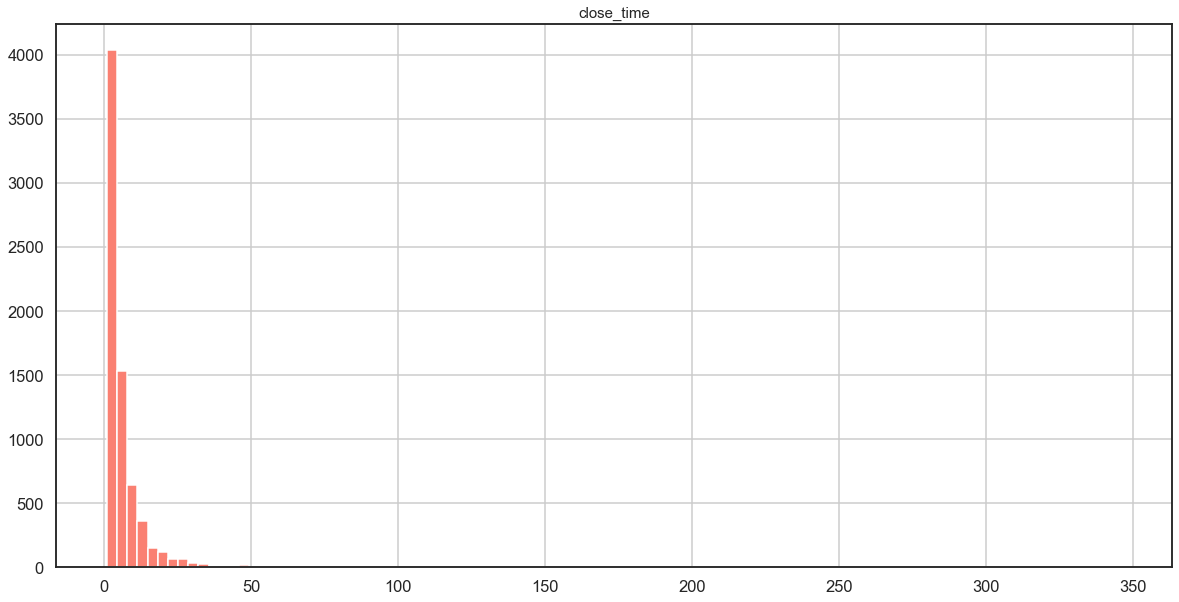

In [284]:
df.hist(column='close_time', bins = 100, figsize = (20,10), color='salmon')

### Patterns in the neighbourhood

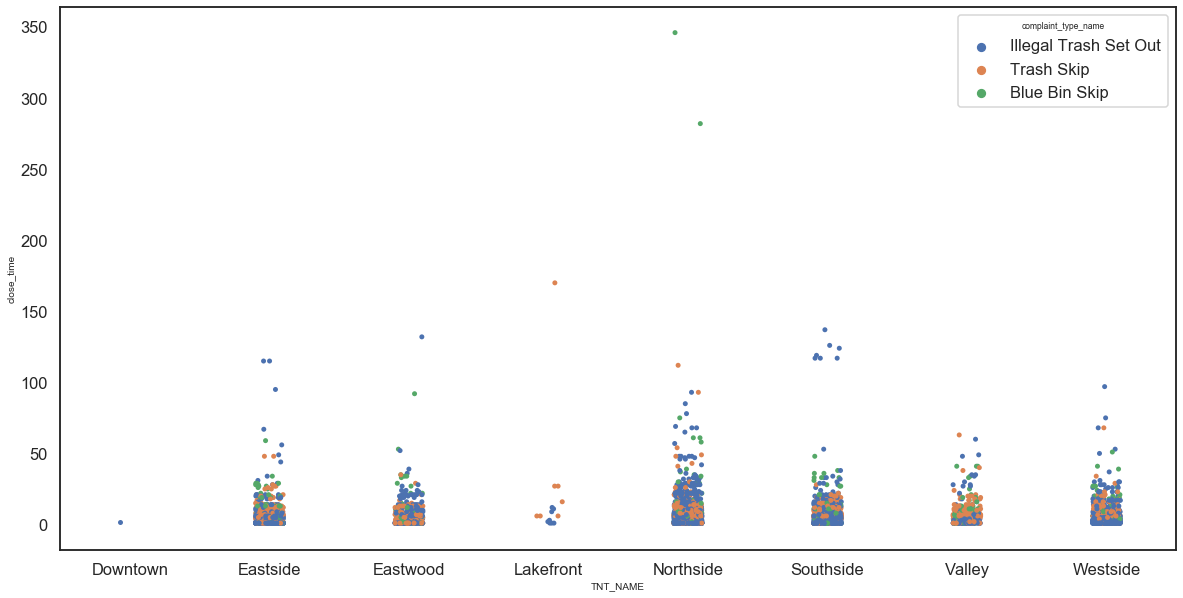

In [285]:
plt.figure(figsize=(20,10))
sns.stripplot(x='TNT_NAME', y='close_time', hue='complaint_type_name', data=df)

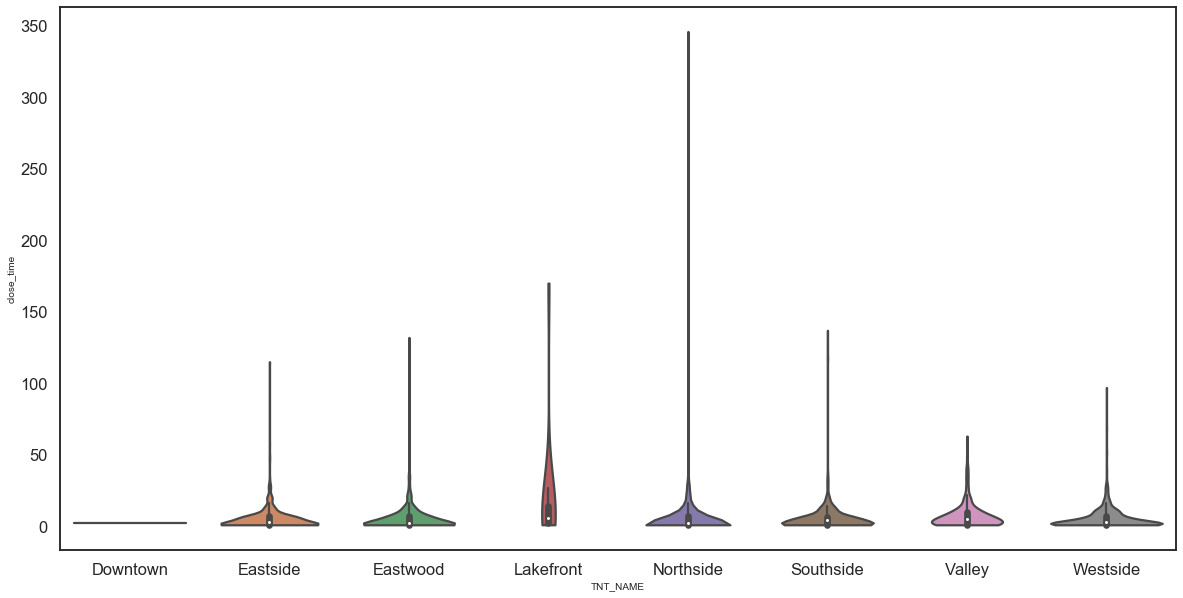

In [286]:
plt.figure(figsize=(20,10))
sns.violinplot(x='TNT_NAME', y='close_time', data=df, cut=0)

### Patterns by Neighbourhood: Illegal Trash Setout

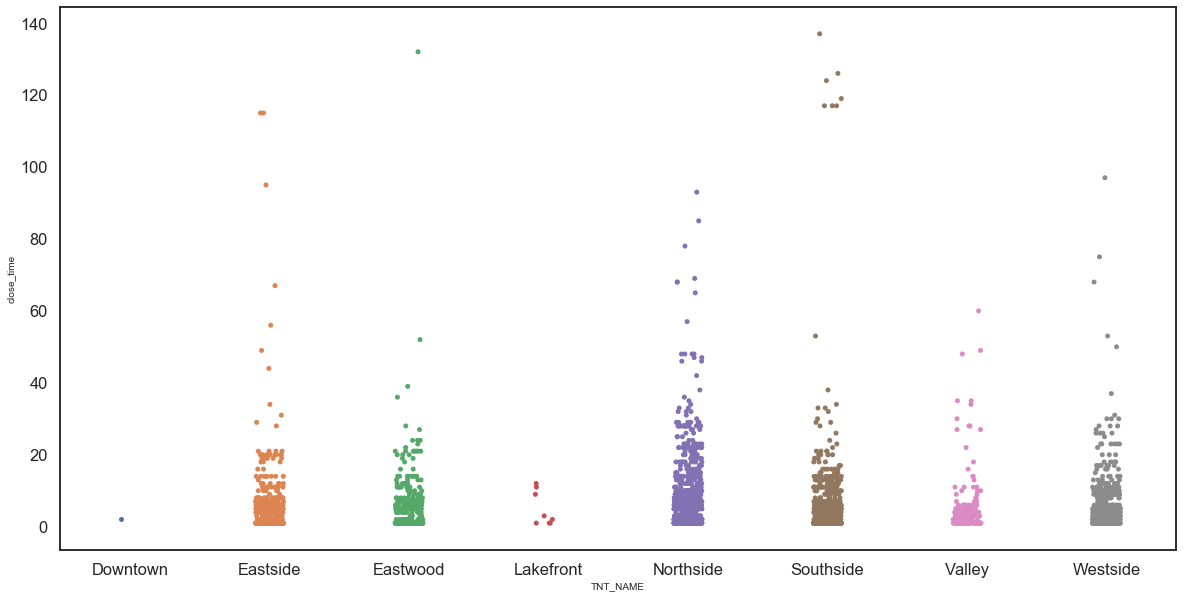

In [287]:
df_set = df[df['complaint_type_name']=='Illegal Trash Set Out']
plt.figure(figsize=(20,10))
sns.stripplot(x='TNT_NAME', y='close_time', data=df_set)

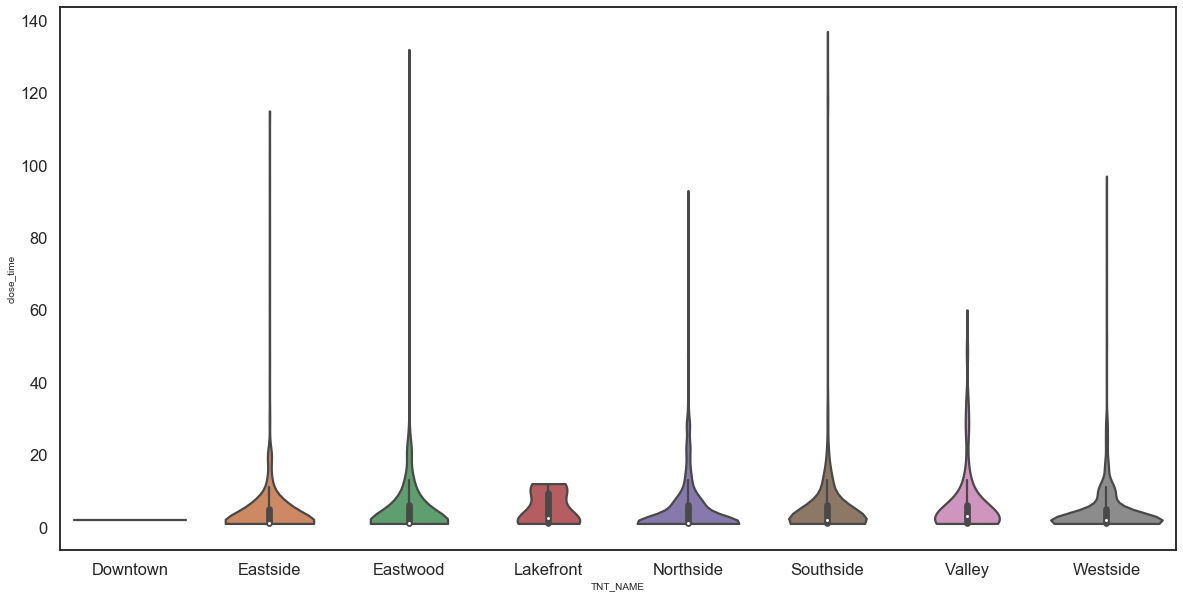

In [288]:
plt.figure(figsize=(20,10))
sns.violinplot(x='TNT_NAME', y='close_time', data=df_set, cut=0)

### Patterns by Neighbourhood: Trash Skip

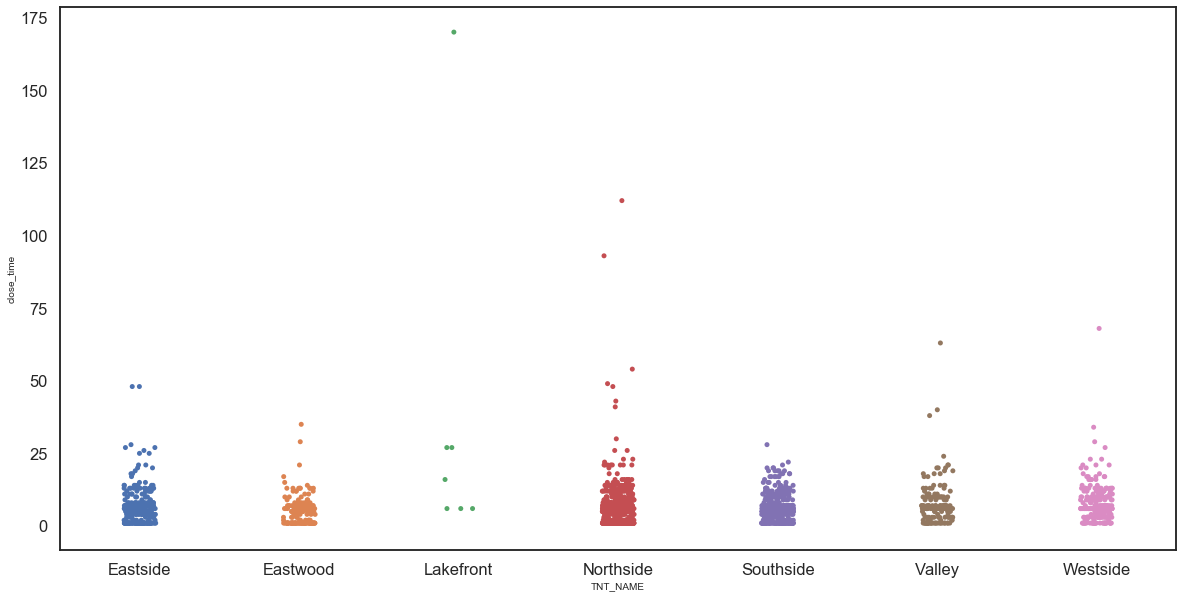

In [289]:
df_trash = df[df['complaint_type_name']=='Trash Skip']
plt.figure(figsize=(20,10))
sns.stripplot(x='TNT_NAME', y='close_time', data=df_trash)

### Patterns by Neighbourhood: BB

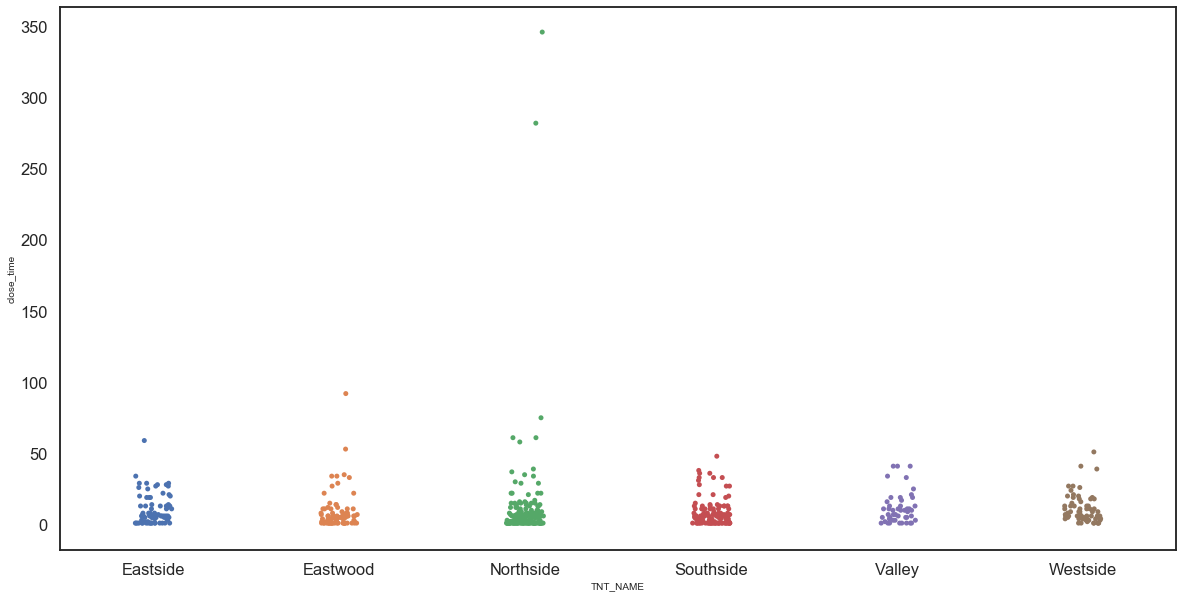

In [290]:
df_bb = df[df['complaint_type_name']=='Blue Bin Skip']
plt.figure(figsize=(20,10))
sns.stripplot(x='TNT_NAME', y='close_time', data=df_bb)

### Patterns by Neighbourhood: both skip

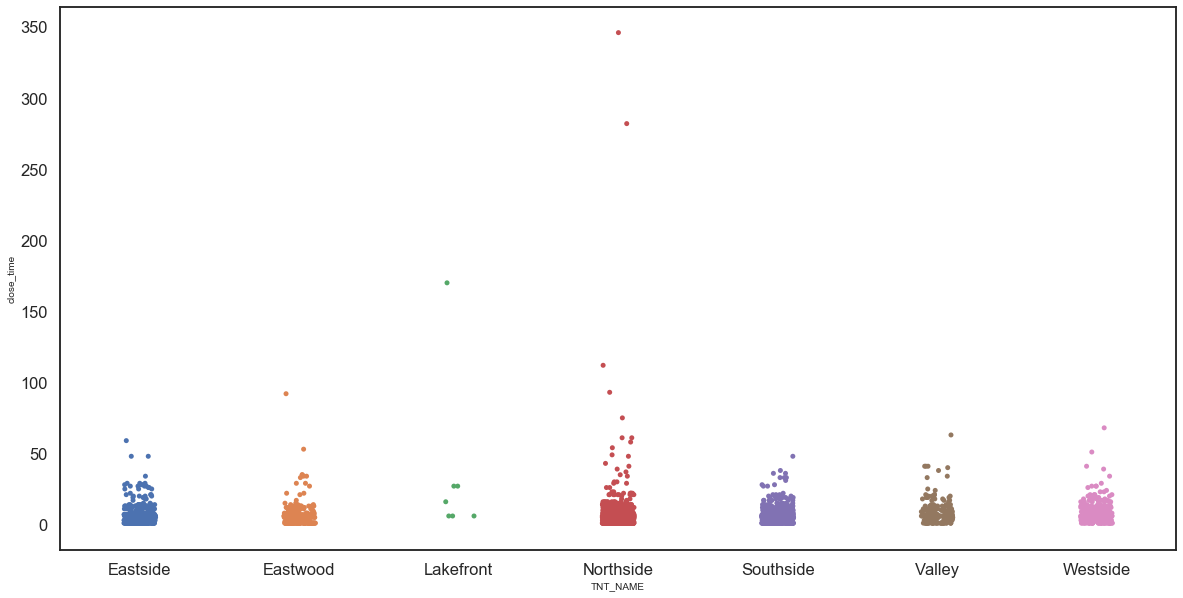

In [291]:
df_skip = df[df['complaint_type_name'].str.contains('Skip')==True]
plt.figure(figsize=(20,10))
sns.stripplot(x='TNT_NAME', y='close_time', data=df_skip)

## Median Income vs time to resolve

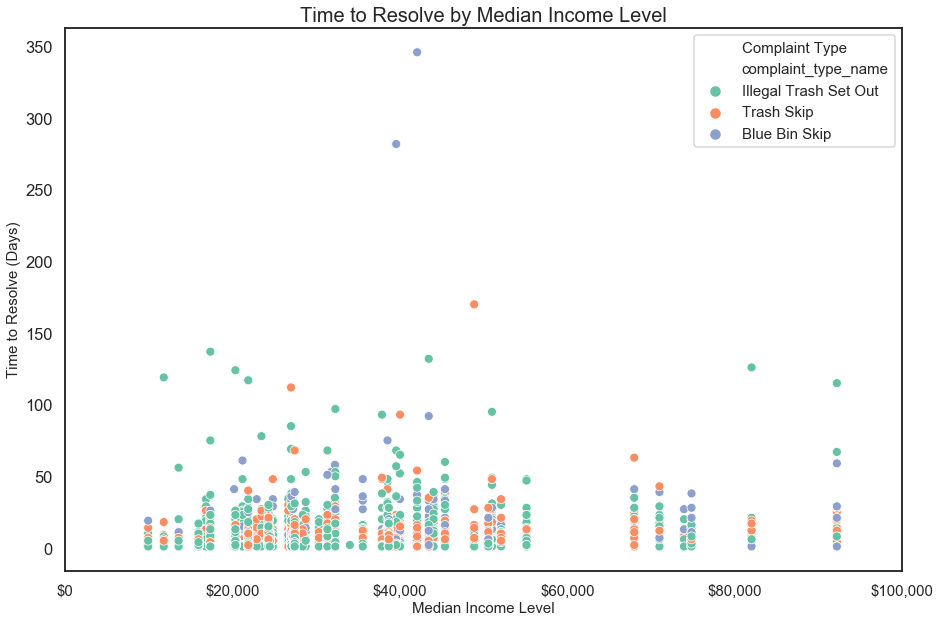

In [301]:
sns.set(font="sans-serif", #The font used for all text
        style="white", #The style of Seaborn
        context="talk", #Preconfigured plot size and scale type in Seaborn; options arranged by size: paper, notebook, talk, and poster
        rc={"figure.figsize":(15, 10), #The size of the figure (y, x) in inches
            "font.size":15, #The default font size
            "axes.titlesize":15, #The size of the x and y axes titles, if titles are set
            "axes.labelsize":10} #The size of the x and y axes labels, if labels are set
        )


sns.scatterplot(x="mhinc1216", y="close_time",
                     hue="complaint_type_name",  data=df, palette=['#66c2a5','#fc8d62','#8da0cb'])

plt.title('Time to Resolve by Median Income Level',fontsize = 20)
plt.xlabel('Median Income Level', fontsize=15)
plt.ylabel('Time to Resolve (Days)',fontsize=15)
plt.xticks(fontsize=15)
plt.legend(title='Complaint Type', fontsize=15, title_fontsize=15)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000],['$0','$20,000','$40,000','$60,000','$80,000','$100,000'],fontsize=15)
plt.savefig('data/output/GP_1117_MHI4.png',bbox_inches = "tight")
plt.show()


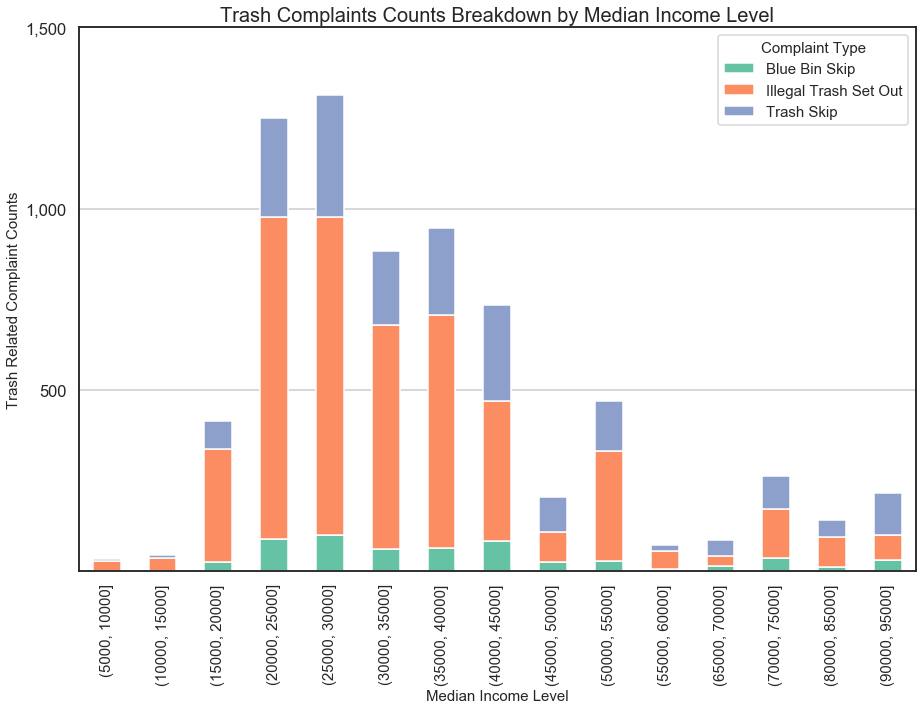

In [293]:
sns.set(font="sans-serif", #The font used for all text
        style="white", #The style of Seaborn
        context="talk", #Preconfigured plot size and scale type in Seaborn; options arranged by size: paper, notebook, talk, and poster
        rc={"figure.figsize":(15, 10), #The size of the figure (y, x) in inches
            "font.size":15, #The default font size
            "axes.titlesize":15, #The size of the x and y axes titles, if titles are set
            "axes.labelsize":10} #The size of the x and y axes labels, if labels are set
        )


interval_range = pd.interval_range(start=5000, freq=5000, end=100000)
df['Median_Income_Range']=pd.cut(df['mhinc1216'],bins=interval_range)
df['Median_Income_Range'].value_counts()

bg1 = df.groupby(['Median_Income_Range', 'complaint_type_name'])['Median_Income_Range'].count().unstack('complaint_type_name').fillna(0)
#bg1 = bg1.sort_values('Illegal Trash Set Out', ascending=False)
bg1.plot(kind = 'bar', 
            stacked = True,  
            title = 'Complaint counts at different income level, breaking down by complaint type', 
            figsize = (15,10),color=['#66c2a5','#fc8d62','#8da0cb']
           )

plt.xticks(fontsize=15)
plt.xlabel('Median Income Level', fontsize=15)
plt.ylabel('Trash Related Complaint Counts', fontsize=15)
plt.title('Trash Complaints Counts Breakdown by Median Income Level', fontsize=20)
plt.yticks([500,1000,1500],['500','1,000','1,500'])
plt.legend(title='Complaint Type', fontsize=15, title_fontsize=15)
plt.grid(axis='y')

plt.savefig('data/output/GP_1117_MHI3.png',bbox_inches = "tight")

----
## % Foreign Born

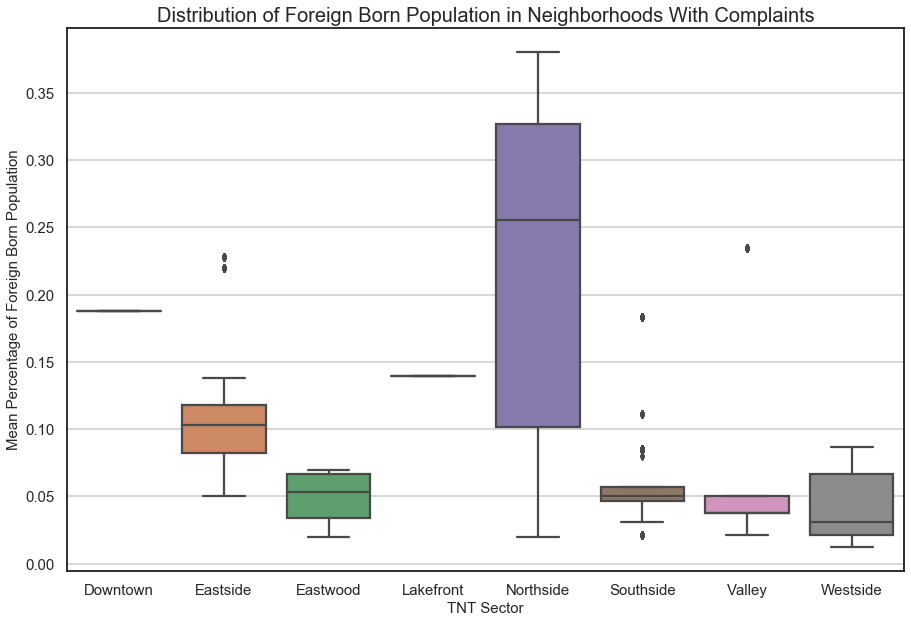

In [294]:
sns.set(font="sans-serif", #The font used for all text
        style="white", #The style of Seaborn
        context="talk", #Preconfigured plot size and scale type in Seaborn; options arranged by size: paper, notebook, talk, and poster
        rc={"figure.figsize":(15, 10), #The size of the figure (y, x) in inches
            "font.size":15, #The default font size
            "axes.titlesize":15, #The size of the x and y axes titles, if titles are set
            "axes.labelsize":10} #The size of the x and y axes labels, if labels are set
        )

f1 = df.sort_values(by='TNT_NAME')
sns.boxplot("TNT_NAME","pfb1216", data=f1)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('TNT Sector', fontsize=15)
plt.ylabel('Mean Percentage of Foreign Born Population', fontsize=15)
plt.title('Distribution of Foreign Born Population in Neighborhoods With Complaints', fontsize=20)

plt.grid(axis='y')
plt.savefig('data/output/GP_1117_FB1.png',bbox_inches = "tight")

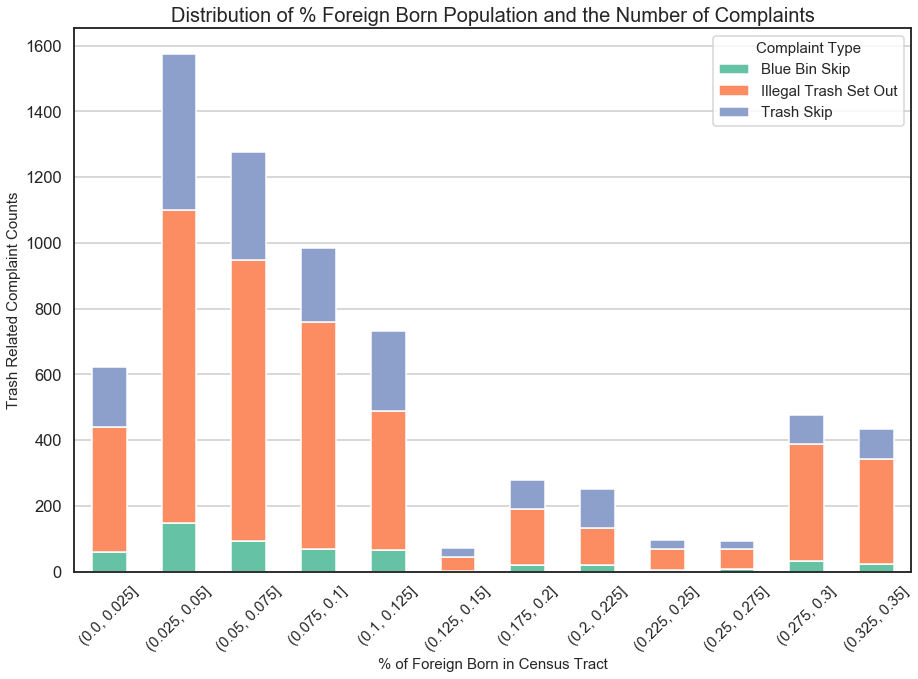

In [295]:
sns.set(font="sans-serif", #The font used for all text
        style="white", #The style of Seaborn
        context="talk", #Preconfigured plot size and scale type in Seaborn; options arranged by size: paper, notebook, talk, and poster
        rc={"figure.figsize":(15, 10), #The size of the figure (y, x) in inches
            "font.size":15, #The default font size
            "axes.titlesize":15, #The size of the x and y axes titles, if titles are set
            "axes.labelsize":10} #The size of the x and y axes labels, if labels are set
        )

df['PercentForeign_Range']=pd.cut(df['pfb1216'],bins=np.linspace(0.0, 0.40, num = 16, endpoint=False))
df['PercentForeign_Range'].value_counts()
f2 = df.groupby(['PercentForeign_Range', 'complaint_type_name'])['PercentForeign_Range'].count().unstack('complaint_type_name').fillna(0)
f2 = f2.plot(kind = 'bar', 
            stacked = True,  
            title = 'Number of complaint at different Foreign born, break down by complaint type', 
            figsize = (15,10), color=['#66c2a5','#fc8d62','#8da0cb'])


plt.xticks(rotation=45, fontsize=15)
plt.xlabel('% of Foreign Born in Census Tract', fontsize=15)
plt.ylabel('Trash Related Complaint Counts', fontsize=15)
plt.title('Distribution of % Foreign Born Population and the Number of Complaints', fontsize=20)

plt.legend(title='Complaint Type', fontsize=15, title_fontsize=15)
plt.grid(axis='y')
plt.savefig('data/output/GP_1117_FB2.png',bbox_inches = "tight")

In [296]:
df_cor = df[['close_time', 'mhinc1216', 'pfb1216', 'pedlt1216', 'pedhs1216', 'pedba1216']]
df_cor.corr()

,close_time,mhinc1216,pfb1216,pedlt1216,pedhs1216,pedba1216
close_time,1.000000,0.022841,-0.002883,-0.002784,0.014640,-0.007810
mhinc1216,0.022841,1.000000,-0.246842,-0.656242,-0.229736,0.569188
pfb1216,-0.002883,-0.246842,1.000000,0.559248,-0.236387,-0.202077
pedlt1216,-0.002784,-0.656242,0.559248,1.000000,0.196307,-0.766654
pedhs1216,0.014640,-0.229736,-0.236387,0.196307,1.000000,-0.780067
pedba1216,-0.007810,0.569188,-0.202077,-0.766654,-0.780067,1.000000
